In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.express as px
import matplotlib.pylab as plt
from pandas.api.types import CategoricalDtype
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
sns.set_style("whitegrid")

# EDA 📊

In [2]:
df=pd.read_csv("../input/online-chess-games/chess_games.csv",index_col=["game_id"])

In [3]:
df.head(3)

,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
game_id,,,,,,,,,,,,,,,,
1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation


### drop columns that has no need

In [4]:
df.drop(["white_id","black_id"],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20058 entries, 1 to 20058
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rated              20058 non-null  bool  
 1   turns              20058 non-null  int64 
 2   victory_status     20058 non-null  object
 3   winner             20058 non-null  object
 4   time_increment     20058 non-null  object
 5   white_rating       20058 non-null  int64 
 6   black_rating       20058 non-null  int64 
 7   moves              20058 non-null  object
 8   opening_code       20058 non-null  object
 9   opening_moves      20058 non-null  int64 
 10  opening_fullname   20058 non-null  object
 11  opening_shortname  20058 non-null  object
 12  opening_response   1207 non-null   object
 13  opening_variation  14398 non-null  object
dtypes: bool(1), int64(4), object(9)
memory usage: 2.2+ MB


In [6]:
df.describe() 

,turns,white_rating,black_rating,opening_moves
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981
std,33.570585,291.253376,291.036126,2.797152
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1398.000000,1391.000000,3.000000
50%,55.000000,1567.000000,1562.000000,4.000000
75%,79.000000,1793.000000,1784.000000,6.000000
max,349.000000,2700.000000,2723.000000,28.000000


In [7]:
df.isna().sum() 

rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_rating             0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

## measure some statistics

### <span style="color:red"> What is the precentage of games wins by each player?

In [8]:
fig=px.pie(df["winner"].value_counts(),names=df["winner"].value_counts().index,values=df["winner"].value_counts().values,
           title="Percentage of Winners",
            color_discrete_sequence=["#FDFEFE","#17202A"," #3498DB"],
           labels={"names":"Player","values":"Num of Games"}
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.45,font_color="#bbb",
    plot_bgcolor="#D0D3D4",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=False,title="percent of commencts")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textfont_size=10)
fig.show()

### <span style="color:red"> How many times the winner was the one that has higher rate?

In [9]:
sample=df[["winner","white_rating","black_rating"]].rename(columns={"white_rating":"white","black_rating":"black"})

In [10]:
sample.head()

,winner,white,black
game_id,,,
1,White,1500,1191
2,Black,1322,1261
3,White,1496,1500
4,White,1439,1454
5,White,1523,1469


In [11]:
sample["w>b"]=(sample["white"] > sample["black"])
sample 

,winner,white,black,w>b
game_id,,,,
1,White,1500,1191,True
2,Black,1322,1261,True
3,White,1496,1500,False
4,White,1439,1454,False
5,White,1523,1469,True
...,...,...,...,...
20054,White,1691,1220,True
20055,Black,1233,1196,True
20056,White,1219,1286,False


In [12]:
mask=((sample["winner"]=="White" )& (sample["w>b"]==True)) | ((sample["winner"]=="Black") & (sample["w>b"]==False))
sample["high_winn"]="low_rank win"
sample.loc[mask,"high_winn"]="high_rank win"

In [13]:
sample

,winner,white,black,w>b,high_winn
game_id,,,,,
1,White,1500,1191,True,high_rank win
2,Black,1322,1261,True,low_rank win
3,White,1496,1500,False,low_rank win
4,White,1439,1454,False,low_rank win
5,White,1523,1469,True,high_rank win
...,...,...,...,...,...
20054,White,1691,1220,True,high_rank win
20055,Black,1233,1196,True,low_rank win
20056,White,1219,1286,False,low_rank win


In [14]:
fig=px.pie(sample["high_winn"].value_counts(),names=sample["high_winn"].value_counts().index,values=sample["high_winn"].value_counts().values,
           title="Winnig Situation",
            color_discrete_sequence=["#FDFEFE","#17202A"],
           labels={"names":"Situation ","values":"Count "}
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.45,font_color="#bbb",
    plot_bgcolor="#D0D3D4",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Situation")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textfont_size=10)
fig.show()

## <span style="color:red"> Which opening move was most frequently used in games in which black won? What about when white won?

In [15]:
# first make column of the openning move
df["opening_move"]=df["moves"].str.slice(0,2)

#### now,Which opening move was most frequently used in games in which black won?

In [16]:
black=df[df["winner"]=="Black"].opening_move.value_counts().nlargest(10)
black

e4    5651
d4    2043
c4     305
Nf     292
e3     255
g3      95
b3      83
f4      82
d3      79
Nc      55
Name: opening_move, dtype: int64

In [17]:
fig=px.bar(y=black.index,x=black.values,
           title="most used oppening moves, black wins".title(),
            color_discrete_sequence=["#21618C"],
           labels={"x":"Count ","y":"Move "},
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#F4F6F7",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=True,title="Opening Moves",color="#fff")
fig.update_xaxes(showgrid=False,tickfont_size=9)
fig.update_traces(textfont_size=1,visible=True)
fig.update_traces(textfont_color="#333",textposition='inside')
fig.show()

### on ther other hand ,Which opening move was most frequently used in games in which white won?

In [18]:
white=df[df["winner"]=="White"].opening_move.value_counts().nlargest(10)
fig=px.bar(y=white.index,x=white.values,
           title="most used oppening moves, White wins".title(),
            color_discrete_sequence=["#21618C"],
           labels={"x":"Count ","y":"Move "},
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#F4F6F7",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=True,title="Opening Moves",color="#fff")
fig.update_xaxes(showgrid=False,tickfont_size=9,visible=True)
fig.update_traces(textfont_size=10,textfont_color="#fff",textposition='inside')
fig.show()

## <span style="color:red">what is the  most significant opening technique?

In [19]:
opening=df["opening_shortname"].value_counts().nlargest(5)
opening

Sicilian Defense     2632
French Defense       1412
Queen's Pawn Game    1233
Italian Game          981
King's Pawn Game      917
Name: opening_shortname, dtype: int64

In [20]:
fig=px.bar(y=opening.index,x=opening.values,
           title="most used Oppenings".title(),
            color_discrete_sequence=["#21618C"],
           labels={"x":"Count ","y":"Move "},
           text=opening.values
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#F4F6F7",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=True,title="Opening Moves",color="#fff")
fig.update_xaxes(showgrid=False,tickfont_size=9,visible=False)
fig.update_traces(textfont_size=10,textfont_color="#fff",textposition='inside')
fig.show()

# Statistical Thinking.

## in the previous section we only talke about the statistic
## now , we will start talking about the parameter

### what is the difference:
- <span style="color:green">statisic : </span> it is the measure that talks about the <span style="color:green"> sample </sapn>
- <span style="color:green">parameter : </span> it is the measure that talks about the <span style="color:green"> population </span> 
<p> It is the most important to make conclution about the data to see the effect on the total population not just the sample</p>
<h4 style="color:red"> what is the question here</h4>
      <p> i want to know if the white player is more likely to win the game or not ?</p>
      <p> or if the higher rank player is more likely to win the game? </p>
 <span style="color:red"> for answering that question we need to make some techniques. </sapn>
 <p> I will use the follwing tquniques </p>
 <p style="color:#333"> - Confidance Interval. </p>
 <p style="color:#333"> - Hypothesis Test. </p>
  


### First: confidence Interval and Bootstraping
- Bootstrap: is any test or metric that uses random sampling with replacement and falls under the broader class of resampling methods.
#### start with the fisrt  question?
#### the white player is more likely to win the game or not ?


In [21]:
df["winner"].value_counts(normalize=True)

White    0.498604
Black    0.454033
Draw     0.047363
Name: winner, dtype: float64

In [22]:
# making sample distribution from the data
sample_distribution=[]
for _ in range(5000):
    # making samples from the main data
    sample=df.sample(len(df),replace=True)
    diff=sample["winner"].value_counts(normalize=True)[0]-sample["winner"].value_counts(normalize=True)[1]
    sample_distribution.append(diff)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



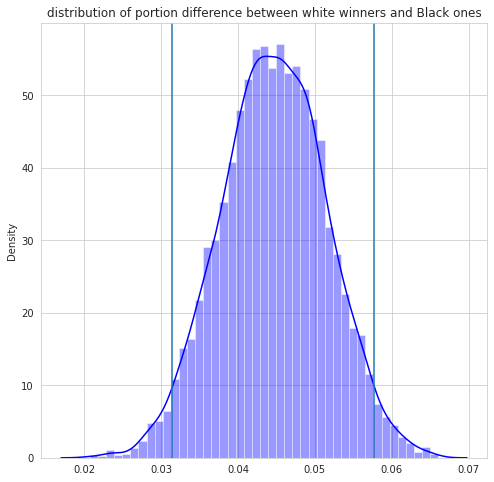

In [23]:
# ploting the sample distribution
plt.figure(figsize=(8,8))
sns.distplot(sample_distribution,kde=True,color="blue")
plt.title("distribution of portion difference between white winners and Black ones")
plt.axvline(np.percentile(sample_distribution,2.5)) 
plt.axvline(np.percentile(sample_distribution,97.5))

In [24]:
np.percentile(sample_distribution,2.5),np.percentile(sample_distribution,97.5)

(0.03145752318276995, 0.05773257553096023)

#### what the plot is saying?
- it says that we are sure by 95% that in general the diff in postion of is in the interval [ .03 , .05 ] and this means that
<span style="color:red"> the white winner is more likely to win the game,but by small amount</span>

## Second: Hypothesis Test
for the null hypothesis:
- null hypothesis: portion of white winners <= portion of black winners. [difference =< 0]
- alternative hypothesis: portion of white winners > portion of black winners. [difference >0]
<p> what is the steps</p>
- the distribution assuming the null hypothesis.
- find the p-value: which is the probalility of getting the statistic or more extreme assuming the null hypothesis.

In [25]:
# the difference assuming the null hypothesis
null_diff=0
# the std of the sample distribution
std= np.std(sample_distribution)
# making the normal distribution using the sample std and null_diff
normal=np.random.normal(loc=0,scale=std,size=5000)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'distribution of portion difference assuming the null hypothesis')

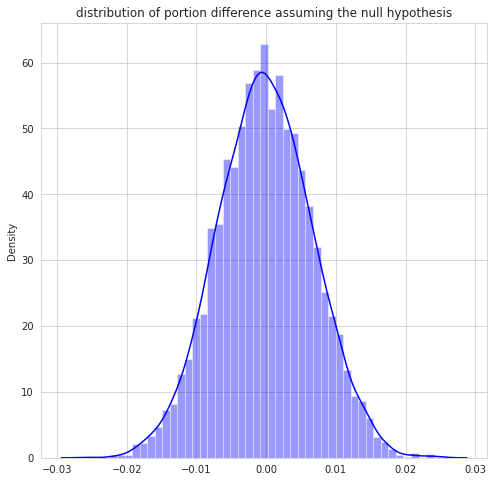

In [26]:
plt.figure(figsize=(8,8))
sns.distplot(normal,kde=True,color="blue")
plt.title("distribution of portion difference assuming the null hypothesis")


#### so , assuming the null hypothesis , what is the probalility of getting the statistic or more extreme [ p-value ]

In [27]:
sample_statistic=(sample["winner"].value_counts(normalize=True)[0])-(sample["winner"].value_counts(normalize=True)[1])
sample_statistic

0.04347392561571445

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



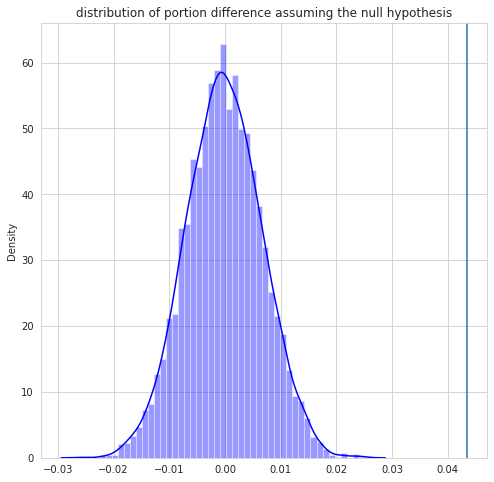

In [28]:
# plot the statistic to make more under stadning
plt.figure(figsize=(8,8))
sns.distplot(normal,kde=True,color="blue")
plt.title("distribution of portion difference assuming the null hypothesis")
plt.axvline(sample_statistic)

### only form the plot , the p_value =0 so the 
- i regect the null hypothesis 
- <span style="color:red">ans: the white winner is more likely to win the game,but by small amount


In [29]:
p_value= (normal>sample_statistic).mean()
p_value

0.0

### that's it. thanks .... waiting for your feedback